In [ ]:
!pip3 install matplotlib

In [ ]:
!pip3 install numpy

In [ ]:
import string
import math

def entropy(pwd: str) -> float:
  has_digits = False
  has_ascii = False
  has_punctuation = False
  for i in pwd: 
    if (i in string.digits):
      has_digits = True
    if (i in string.ascii_letters):
      has_ascii = True
    if (i in string.punctuation):
      has_punctuation = True
  l_pwd = 0
  if (has_digits):
    l_pwd += len(string.digits)
  if (has_ascii):
    l_pwd += len(string.ascii_letters)
  if (has_punctuation):
    l_pwd += len(string.punctuation)
  return len(pwd) * (math.log(l_pwd)/math.log(2))

In [ ]:
print(entropy("Dj@%1"))

32.772944258388186


In [ ]:
print(entropy("Suma2022"))

47.633570483095006


In [ ]:
print(entropy("Dat@123"))

45.882121961743465


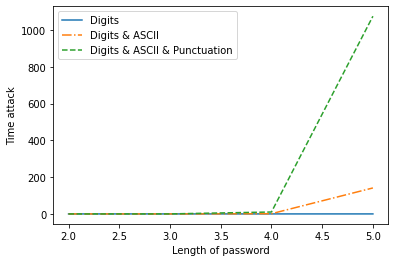

In [ ]:
import string
from itertools import product
from time import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math


# n is length of pwd
# l_char list character want generate pwd
def generate_password(n, l_char):
  pwd = ""
  for _ in range(0,n):
    pwd += l_char[random.randint(0, len(l_char) - 1)]
  return pwd 


def product_loop(password, generator):
  for p in generator:
      if ''.join(p) == password:
          return ''.join(p)
  return False


# Brute force case password includ all digits
def brute_force_case_digits(password, max_nchar=8):
  for l in range(1, 9):
    generator = product(string.digits, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p

# Brute force case password inclue ditgits & ascii
def brute_force_case_digits_ascii(password, max_nchar=8):
  for l in range(1, max_nchar + 1):
    generator = product(string.digits + string.ascii_letters, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p

# Brute force case password include digits ascii punctuation
def brute_force_case_digits_ascii_punctuation(password, max_nchar=8):
  all_char = string.digits + string.ascii_letters + string.punctuation
  for l in range(1, max_nchar + 1):
      generator = product(all_char, repeat=int(l))
      p = product_loop(password, generator)
      if p is not False:
          return p


pattern_case_digits = []
pattern_case_digits_ascii = []
pattern_case_digits_ascii_punctuation = []


for i in range(2, 6):
  pwd_case_digits = generate_password(i, string.digits)
  pwd_case_digits_ascii = generate_password(i, string.digits + string.ascii_letters)
  pwd_case_digits_ascii_punctuation = generate_password(i, string.digits + string.ascii_letters + string.punctuation)

  start = time()
  brute_force_case_digits(pwd_case_digits,100)
  end = time()
  time_attack = end - start
  pattern_case_digits.append({
      "length" : i,
      "time" : end - start,
  })
  
  start = time()
  brute_force_case_digits_ascii(pwd_case_digits_ascii,100)
  end = time()
  time_attack = end - start
  pattern_case_digits_ascii.append({
      "length" : i,
      "time" : end - start,
  })

  start = time()
  brute_force_case_digits_ascii_punctuation(pwd_case_digits_ascii_punctuation,100)
  end = time()
  time_attack = end - start
  pattern_case_digits_ascii_punctuation.append({
      "length" : i,
      "time" : end - start,
  })


x_digits = np.array([i["length"] for i in pattern_case_digits])
y_digits = np.array([i["time"] for i in pattern_case_digits])


x_digits_ascii = np.array([i["length"] for i in pattern_case_digits_ascii])
y_digits_ascii = np.array([i["time"] for i in pattern_case_digits_ascii])

x_digits_ascii_punctuation = np.array([i["length"] for i in pattern_case_digits_ascii_punctuation])
y_digits_ascii_punctuation = np.array([i["time"] for i in pattern_case_digits_ascii_punctuation])

plt.xlabel("Length of password")
plt.ylabel("Time attack")
plt.plot(x_digits, y_digits, label="Digits", linestyle="-")
plt.plot(x_digits_ascii, y_digits_ascii, label="Digits & ASCII", linestyle="-.")
plt.plot(x_digits_ascii_punctuation, y_digits_ascii_punctuation, label="Digits & ASCII & Punctuation", linestyle="--")

plt.legend()
plt.show()





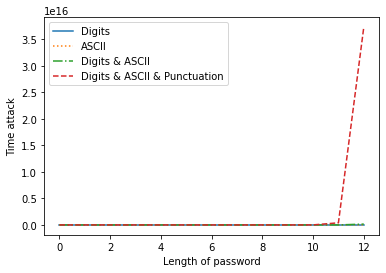

In [ ]:
import string
from itertools import product
from time import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math


def product_loop(password, generator):
  for p in generator:
      if ''.join(p) == password:
          return ''.join(p)
  return False


# Brute force case password include all digits
def brute_force_case_digits(password, max_nchar=8):
  for l in range(1, max_nchar + 1):
    generator = product(string.digits, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p

# Brute force case password include all ASCII
def brute_force_case_ascii(password, max_nchar=8):
  for l in range(1, max_nchar + 1):
    generator = product(string.ascii_letters, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p

# Brute force case password include ditgits & ascii
def brute_force_case_digits_ascii(password, max_nchar=8):
  for l in range(1, max_nchar + 1):
    generator = product(string.digits + string.ascii_letters, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p

# Brute force case password include digits ascii punctuation
def brute_force_case_digits_ascii_punctuation(password, max_nchar=8):
  all_char = string.digits + string.ascii_letters + string.punctuation
  for l in range(1, max_nchar + 1):
      generator = product(all_char, repeat=int(l))
      p = product_loop(password, generator)
      if p is not False:
          return p


pattern_case_digits = []
pattern_case_ascii = []
pattern_case_digits_ascii = []
pattern_case_digits_ascii_punctuation = []


counter = 0

data_set_digits = ['5243','42342','563466','3463467','34676458','457894856','2646352364','45435345323','346536560856']
data_set_ascii = ['gsgA','AFetg','FDfyef','sdgsgAT','trtrtATb','sWtGgRDGD','GRRTRVfsgg','fsdgEATdfgh','FDersdSAGhda']
data_set_digits_ascii = ['3FGd','gg4sA','sgw3Af','ftA4g5A','nfsA834H','ikwik495j','tAet4459aA','gkM34kg6Afr','dfgAS34eag35']
data_set_digits_ascii_punctuation = ['#f4F','Fi4@k','f@0jfA','@fk3Aga','%#kfA3fd','gjn$as1A5','3F$dkm$Efs','fdk#4jfgsA5','eAsedfc#23vc']


for i in range(0, len(data_set_digits)):
  if len(data_set_digits[i]) > 5:
    pattern_case_digits.append({
        "length" : len(data_set_digits[i]),
        "time" : pattern_case_digits[i - 1]["time"] * len(string.digits),
    })

    pattern_case_ascii.append({
        "length" : len(data_set_ascii[i]),
        "time" : pattern_case_ascii[i - 1]["time"] * len(string.ascii_letters),
    })

    pattern_case_digits_ascii.append({
        "length" : len(data_set_digits_ascii[i]),
        "time" : pattern_case_digits_ascii[i - 1]["time"] * len(string.digits + string.ascii_letters),
    })

    pattern_case_digits_ascii_punctuation.append({
        "length" : len(data_set_digits_ascii_punctuation[i]),
        "time" : pattern_case_digits_ascii_punctuation[i - 1]["time"] * len(string.digits + string.ascii_letters + string.punctuation),
    })
  else:
    start = time()
    brute_force_case_digits(data_set_digits[i],100)
    end = time()
    time_attack = end - start
    pattern_case_digits.append({
        "length" : i,
        "time" : end - start,
    })


    start = time()
    brute_force_case_ascii(data_set_ascii[i],100)
    end = time()
    time_attack = end - start
    pattern_case_ascii.append({
        "length" : i,
        "time" : end - start,
    })
  
    start = time()
    brute_force_case_digits_ascii(data_set_digits_ascii[i],100)
    end = time()
    time_attack = end - start
    pattern_case_digits_ascii.append({
        "length" : i,
        "time" : end - start,
    })

    start = time()
    brute_force_case_digits_ascii_punctuation(data_set_digits_ascii_punctuation[i],100)
    end = time()
    time_attack = end - start
    pattern_case_digits_ascii_punctuation.append({
        "length" : i,
        "time" : end - start,
    })

x_digits = np.array([i["length"] for i in pattern_case_digits])
y_digits = np.array([i["time"] for i in pattern_case_digits])

x_ascii = np.array([i["length"] for i in pattern_case_ascii])
y_ascii = np.array([i["time"] for i in pattern_case_ascii])

x_digits_ascii = np.array([i["length"] for i in pattern_case_digits_ascii])
y_digits_ascii = np.array([i["time"] for i in pattern_case_digits_ascii])

x_digits_ascii_punctuation = np.array([i["length"] for i in pattern_case_digits_ascii_punctuation])
y_digits_ascii_punctuation = np.array([i["time"] for i in pattern_case_digits_ascii_punctuation])

plt.xlabel("Length of password")
plt.ylabel("Time attack")
plt.plot(x_digits, y_digits, label="Digits", linestyle="-")
plt.plot(x_ascii, y_ascii, label="ASCII", linestyle=":")
plt.plot(x_digits_ascii, y_digits_ascii, label="Digits & ASCII", linestyle="-.")
plt.plot(x_digits_ascii_punctuation, y_digits_ascii_punctuation, label="Digits & ASCII & Punctuation", linestyle="--")

plt.legend()
plt.show()



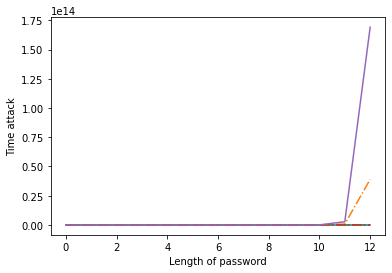

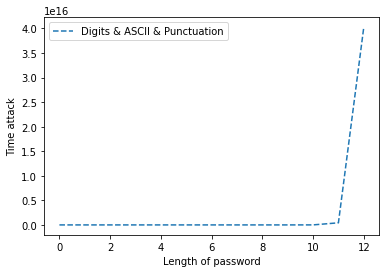

In [6]:
import string
from itertools import product
from time import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math


def product_loop(password, generator):
  for p in generator:
      if ''.join(p) == password:
          return ''.join(p)
  return False


def brute_force(password, l_char, max_nchar=8):
  for l in range(1, max_nchar + 1):
    generator = product(l_char, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p



pattern_case_digits = []
pattern_case_ascii = []
pattern_case_ascii_uppercase = []
pattern_case_ascii_lowercase = []
pattern_case_digits_ascii = []
pattern_case_digits_ascii_punctuation = []


counter = 0

data_set_digits = ['5243','42342','563466','3463467','34676458','457894856','2646352364','45435345323','346536560856']
data_set_ascii = ['gsgA','AFetg','FDfyef','sdgsgAT','trtrtATb','sWtGgRDGD','GRRTRVfsgg','fsdgEATdfgh','FDersdSAGhda']
data_set_ascii_uppercase = ['FEGE','GEGED','EWGJTE','WGSDWER','HUEEGVDV','DHOTENMWE','ORYRVWEFBN','SDGWGEGSVVD','RYERBERVRWEV']
data_set_ascii_lowercase = ['drhg','srhwv','giyvgr','wewgggr','pyuynetv','greruyvbr','ergsdvsdwg','hrehevwevvw','sdvdwreywerv']
data_set_digits_ascii = ['3FGd','gg4sA','sgw3Af','ftA4g5A','nfsA834H','ikwik495j','tAet4459aA','gkM34kg6Afr','dfgAS34eag35']
data_set_digits_ascii_punctuation = ['#f4F','Fi4@k','f@0jfA','@fk3Aga','%#kfA3fd','gjn$as1A5','3F$dkm$Efs','fdk#4jfgsA5','eAsedfc#23vc']


for i in range(0, len(data_set_digits)):
  if len(data_set_digits[i]) > 5:
    pattern_case_digits.append({
        "length" : len(data_set_digits[i]),
        "time" : pattern_case_digits[i - 1]["time"] * len(string.digits),
    })

    pattern_case_ascii.append({
        "length" : len(data_set_ascii[i]),
        "time" : pattern_case_ascii[i - 1]["time"] * len(string.ascii_letters),
    })

    pattern_case_ascii_uppercase.append({
        "length" : len(data_set_ascii_uppercase[i]),
        "time" : pattern_case_ascii_uppercase[i - 1]["time"] * len(string.ascii_uppercase),
    })

    pattern_case_ascii_lowercase.append({
        "length" : len(data_set_ascii_lowercase[i]),
        "time" : pattern_case_ascii_lowercase[i - 1]["time"] * len(string.ascii_lowercase),
    })

    pattern_case_digits_ascii.append({
        "length" : len(data_set_digits_ascii[i]),
        "time" : pattern_case_digits_ascii[i - 1]["time"] * len(string.digits + string.ascii_letters),
    })

    pattern_case_digits_ascii_punctuation.append({
        "length" : len(data_set_digits_ascii_punctuation[i]),
        "time" : pattern_case_digits_ascii_punctuation[i - 1]["time"] * len(string.digits + string.ascii_letters + string.punctuation),
    })
  else:
    start = time()
    brute_force(data_set_digits[i], string.digits, 100)
    end = time()
    time_attack = end - start
    pattern_case_digits.append({
        "length" : i,
        "time" : end - start,
    })


    start = time()
    brute_force(data_set_ascii[i], string.ascii_letters, 100)
    end = time()
    time_attack = end - start
    pattern_case_ascii.append({
        "length" : i,
        "time" : end - start,
    })

    start = time()
    brute_force(data_set_ascii_uppercase[i], string.ascii_uppercase, 100)
    end = time()
    time_attack = end - start
    pattern_case_ascii_uppercase.append({
        "length" : i,
        "time" : end - start,
    })

    start = time()
    brute_force(data_set_ascii_lowercase[i], string.ascii_lowercase, 100)
    end = time()
    time_attack = end - start
    pattern_case_ascii_lowercase.append({
        "length" : i,
        "time" : end - start,
    })
  
    start = time()
    brute_force(data_set_digits_ascii[i], string.digits + string.ascii_letters, 100)
    end = time()
    time_attack = end - start
    pattern_case_digits_ascii.append({
        "length" : i,
        "time" : end - start,
    })

    start = time()
    brute_force(data_set_digits_ascii_punctuation[i], string.digits + string.ascii_letters + string.punctuation,100)
    end = time()
    time_attack = end - start
    pattern_case_digits_ascii_punctuation.append({
        "length" : i,
        "time" : end - start,
    })

x_digits = np.array([i["length"] for i in pattern_case_digits])
y_digits = np.array([i["time"] for i in pattern_case_digits])

x_ascii = np.array([i["length"] for i in pattern_case_ascii])
y_ascii = np.array([i["time"] for i in pattern_case_ascii])

x_ascii_uppercase = np.array([i["length"] for i in pattern_case_ascii_uppercase])
y_ascii_uppercase = np.array([i["time"] for i in pattern_case_ascii_uppercase])

x_ascii_lowercase = np.array([i["length"] for i in pattern_case_ascii_lowercase])
y_ascii_lowercase = np.array([i["time"] for i in pattern_case_ascii_lowercase])

x_digits_ascii = np.array([i["length"] for i in pattern_case_digits_ascii])
y_digits_ascii = np.array([i["time"] for i in pattern_case_digits_ascii])

x_digits_ascii_punctuation = np.array([i["length"] for i in pattern_case_digits_ascii_punctuation])
y_digits_ascii_punctuation = np.array([i["time"] for i in pattern_case_digits_ascii_punctuation])

plt.figure(1)
plt.xlabel("Length of password")
plt.ylabel("Time attack")
plt.plot(x_digits, y_digits, label="Digits", linestyle="-")
plt.plot(x_ascii, y_ascii, label="ASCII", linestyle="-.")
plt.plot(x_ascii_uppercase, y_ascii_uppercase, label="ASCII Uppercase", linestyle="--")
plt.plot(x_ascii_lowercase, y_ascii_lowercase, label="ASCII Lowercase", linestyle="-.")
plt.plot(x_digits_ascii, y_digits_ascii, label="Digits & ASCII", linestyle="-")

print("\n")

plt.figure(2)
plt.xlabel("Length of password")
plt.ylabel("Time attack")
plt.plot(x_digits_ascii_punctuation, y_digits_ascii_punctuation, label="Digits & ASCII & Punctuation", linestyle="--")

plt.legend()
plt.show()


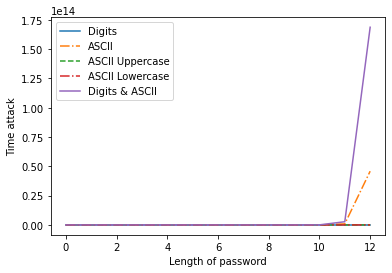

In [4]:
import string
from itertools import product
from time import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math


def product_loop(password, generator):
  for p in generator:
      if ''.join(p) == password:
          return ''.join(p)
  return False


def brute_force(password, l_char, max_nchar=8):
  for l in range(1, max_nchar + 1):
    generator = product(l_char, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p



pattern_case_digits = []
pattern_case_ascii = []
pattern_case_ascii_uppercase = []
pattern_case_ascii_lowercase = []
pattern_case_digits_ascii = []


data_set_digits = ['5243','42342','563466','3463467','34676458','457894856','2646352364','45435345323','346536560856']
data_set_ascii = ['gsgA','AFetg','FDfyef','sdgsgAT','trtrtATb','sWtGgRDGD','GRRTRVfsgg','fsdgEATdfgh','FDersdSAGhda']
data_set_ascii_uppercase = ['FEGE','GEGED','EWGJTE','WGSDWER','HUEEGVDV','DHOTENMWE','ORYRVWEFBN','SDGWGEGSVVD','RYERBERVRWEV']
data_set_ascii_lowercase = ['drhg','srhwv','giyvgr','wewgggr','pyuynetv','greruyvbr','ergsdvsdwg','hrehevwevvw','sdvdwreywerv']
data_set_digits_ascii = ['3FGd','gg4sA','sgw3Af','ftA4g5A','nfsA834H','ikwik495j','tAet4459aA','gkM34kg6Afr','dfgAS34eag35']


for i in range(0, len(data_set_digits)):
  if len(data_set_digits[i]) > 5:
    pattern_case_digits.append({
        "length" : len(data_set_digits[i]),
        "time" : pattern_case_digits[i - 1]["time"] * len(string.digits),
    })

    pattern_case_ascii.append({
        "length" : len(data_set_ascii[i]),
        "time" : pattern_case_ascii[i - 1]["time"] * len(string.ascii_letters),
    })

    pattern_case_ascii_uppercase.append({
        "length" : len(data_set_ascii_uppercase[i]),
        "time" : pattern_case_ascii_uppercase[i - 1]["time"] * len(string.ascii_uppercase),
    })

    pattern_case_ascii_lowercase.append({
        "length" : len(data_set_ascii_lowercase[i]),
        "time" : pattern_case_ascii_lowercase[i - 1]["time"] * len(string.ascii_lowercase),
    })

    pattern_case_digits_ascii.append({
        "length" : len(data_set_digits_ascii[i]),
        "time" : pattern_case_digits_ascii[i - 1]["time"] * len(string.digits + string.ascii_letters),
    })

  else:
    start = time()
    brute_force(data_set_digits[i], string.digits, 100)
    end = time()
    time_attack = end - start
    pattern_case_digits.append({
        "length" : i,
        "time" : end - start,
    })


    start = time()
    brute_force(data_set_ascii[i], string.ascii_letters, 100)
    end = time()
    time_attack = end - start
    pattern_case_ascii.append({
        "length" : i,
        "time" : end - start,
    })

    start = time()
    brute_force(data_set_ascii_uppercase[i], string.ascii_uppercase, 100)
    end = time()
    time_attack = end - start
    pattern_case_ascii_uppercase.append({
        "length" : i,
        "time" : end - start,
    })

    start = time()
    brute_force(data_set_ascii_lowercase[i], string.ascii_lowercase, 100)
    end = time()
    time_attack = end - start
    pattern_case_ascii_lowercase.append({
        "length" : i,
        "time" : end - start,
    })
  
    start = time()
    brute_force(data_set_digits_ascii[i], string.digits + string.ascii_letters, 100)
    end = time()
    time_attack = end - start
    pattern_case_digits_ascii.append({
        "length" : i,
        "time" : end - start,
    })

x_digits = np.array([i["length"] for i in pattern_case_digits])
y_digits = np.array([i["time"] for i in pattern_case_digits])

x_ascii = np.array([i["length"] for i in pattern_case_ascii])
y_ascii = np.array([i["time"] for i in pattern_case_ascii])

x_ascii_uppercase = np.array([i["length"] for i in pattern_case_ascii_uppercase])
y_ascii_uppercase = np.array([i["time"] for i in pattern_case_ascii_uppercase])

x_ascii_lowercase = np.array([i["length"] for i in pattern_case_ascii_lowercase])
y_ascii_lowercase = np.array([i["time"] for i in pattern_case_ascii_lowercase])

x_digits_ascii = np.array([i["length"] for i in pattern_case_digits_ascii])
y_digits_ascii = np.array([i["time"] for i in pattern_case_digits_ascii])

plt.xlabel("Length of password")
plt.ylabel("Time attack")
plt.plot(x_digits, y_digits, label="Digits", linestyle="-")
plt.plot(x_ascii, y_ascii, label="ASCII", linestyle="-.")
plt.plot(x_ascii_uppercase, y_ascii_uppercase, label="ASCII Uppercase", linestyle="--")
plt.plot(x_ascii_lowercase, y_ascii_lowercase, label="ASCII Lowercase", linestyle="-.")
plt.plot(x_digits_ascii, y_digits_ascii, label="Digits & ASCII", linestyle="-")

plt.legend()
plt.show()

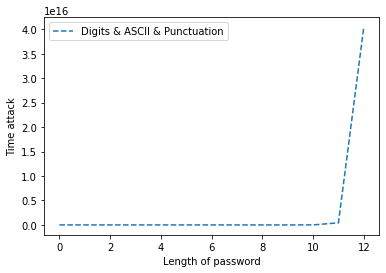

In [5]:
import string
from itertools import product
from time import time
import random
import matplotlib.pyplot as plt
import numpy as np
import math


def product_loop(password, generator):
  for p in generator:
      if ''.join(p) == password:
          return ''.join(p)
  return False


def brute_force(password, l_char, max_nchar=8):
  for l in range(1, max_nchar + 1):
    generator = product(l_char, repeat=int(l))
    p = product_loop(password, generator)
    if p is not False:
        return p


pattern_case_digits_ascii_punctuation = []


data_set_digits_ascii_punctuation = ['#f4F','Fi4@k','f@0jfA','@fk3Aga','%#kfA3fd','gjn$as1A5','3F$dkm$Efs','fdk#4jfgsA5','eAsedfc#23vc']


for i in range(0, len(data_set_digits)):
  if len(data_set_digits[i]) > 5:
    pattern_case_digits_ascii_punctuation.append({
        "length" : len(data_set_digits_ascii_punctuation[i]),
        "time" : pattern_case_digits_ascii_punctuation[i - 1]["time"] * len(string.digits + string.ascii_letters + string.punctuation),
    })
  else:
    start = time()
    brute_force(data_set_digits_ascii_punctuation[i], string.digits + string.ascii_letters + string.punctuation,100)
    end = time()
    time_attack = end - start
    pattern_case_digits_ascii_punctuation.append({
        "length" : i,
        "time" : end - start,
    })

x_digits_ascii_punctuation = np.array([i["length"] for i in pattern_case_digits_ascii_punctuation])
y_digits_ascii_punctuation = np.array([i["time"] for i in pattern_case_digits_ascii_punctuation])

plt.xlabel("Length of password")
plt.ylabel("Time attack")
plt.plot(x_digits_ascii_punctuation, y_digits_ascii_punctuation, label="Digits & ASCII & Punctuation", linestyle="--")

plt.legend()
plt.show()